In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
import os

In [2]:
#reading data
data = pd.read_csv("C:\Lachin\DataSets\possum\possum.csv")

In [3]:
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
print("Shape of the dataset: {}".format(data.shape))

Shape of the dataset: (104, 14)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [6]:
for column in data.columns:
    print("Number of unique values in the column {}: {}".format(column, data[column].nunique()))

Number of unique values in the column case: 104
Number of unique values in the column site: 7
Number of unique values in the column Pop: 2
Number of unique values in the column sex: 2
Number of unique values in the column age: 9
Number of unique values in the column hdlngth: 71
Number of unique values in the column skullw: 64
Number of unique values in the column totlngth: 34
Number of unique values in the column taill: 19
Number of unique values in the column footlgth: 75
Number of unique values in the column earconch: 69
Number of unique values in the column eye: 35
Number of unique values in the column chest: 19
Number of unique values in the column belly: 24


In [7]:
#checking value counts
data['site'].value_counts()

1    33
7    18
2    13
5    13
6    13
3     7
4     7
Name: site, dtype: int64

In [8]:
#checking value counts
data['age'].value_counts()

3.0    27
2.0    16
4.0    14
5.0    13
6.0    12
1.0    10
7.0     7
9.0     2
8.0     1
Name: age, dtype: int64

Number of quantitative columns: 12


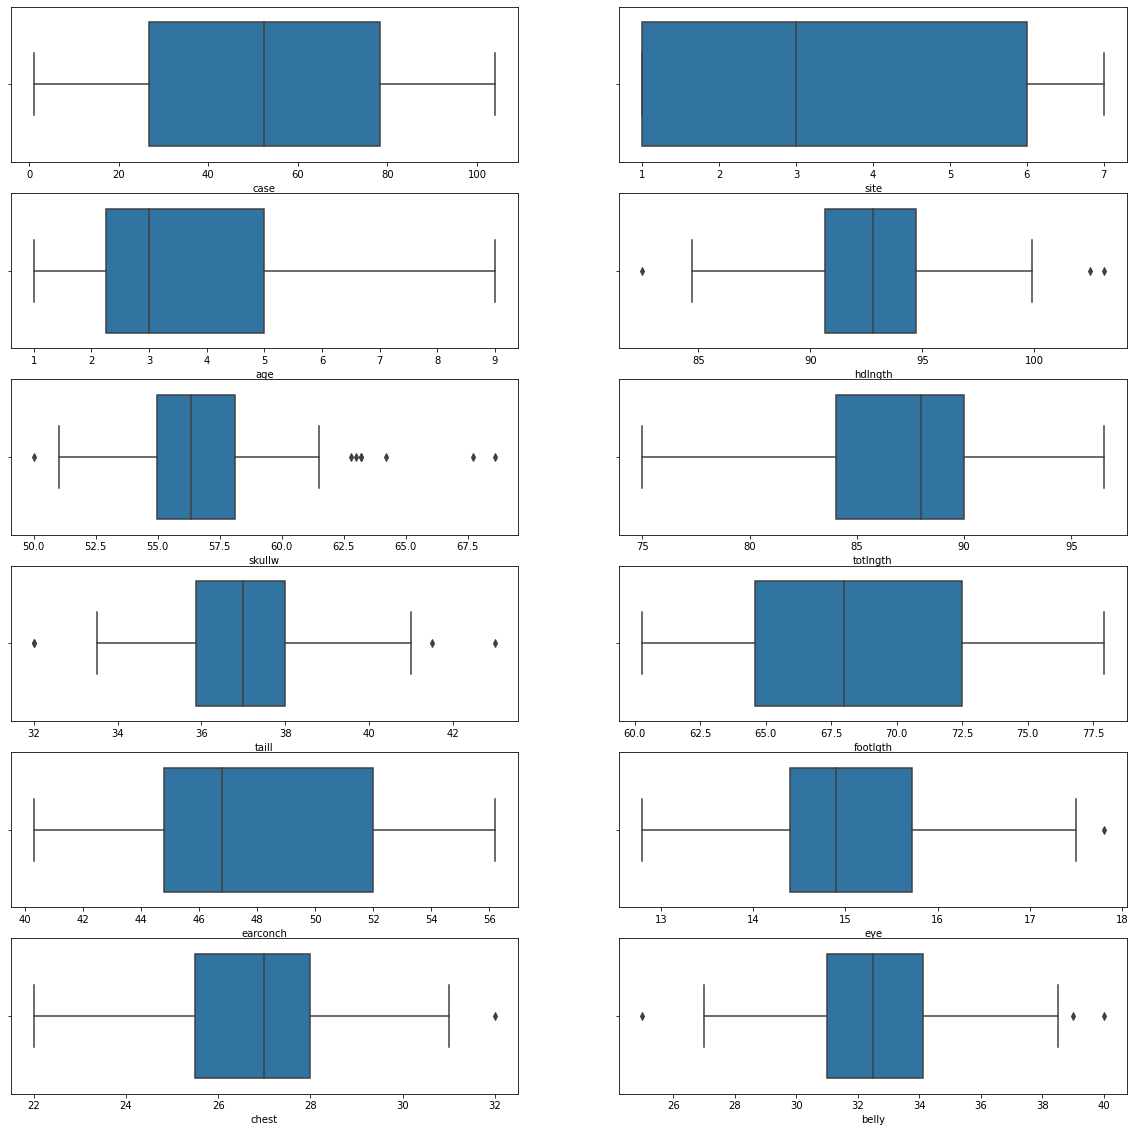

In [21]:
#checking outliers
data_out = data.select_dtypes(exclude = 'object')
print("Number of quantitative columns: {}".format(len(data_out.columns)))
plt.figure(figsize=(20,20))
for index, column in enumerate(data_out.columns):
    plt.subplot(6,2,index+1)
    sns.boxplot(x = data[column])
    #plt.title("Boxplot of the variable {}".format(column))

In [22]:
#checking for missing values
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [24]:
#filling missing values
data['footlgth'].fillna(data['footlgth'].mean(), inplace = True)

In [26]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [27]:
#dropping missing values is not reccomended here since number of data rows are not sufficient
#but age variabloe is somewhat categoricla and mean values wont fit much iwth this
#Mode values can be used, but it may have some effects on the model performance 
#therefore it is better remove the missing values
print("Shape of the data before removing the missing values: {}\n".format(data.shape))
data.dropna(how = "any", inplace = True)
print("Shape of the data after removing the missing values: {}".format(data.shape))

Shape of the data before removing the missing values: (104, 14)

Shape of the data after removing the missing values: (102, 14)


# Data analysis

In [29]:
#only the quantitative variables
data_out.head()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [30]:
data_out.corr()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.970353,-0.194525,-0.209177,-0.125065,-0.334329,0.315351,-0.782368,-0.773727,-0.084078,-0.402303,-0.211671
site,0.970353,1.000000,-0.131423,-0.163646,-0.083548,-0.260843,0.380444,-0.783009,-0.790716,-0.036987,-0.345494,-0.175266
age,-0.194525,-0.131423,1.000000,0.319022,0.285107,0.260280,0.118241,0.126190,0.053405,0.235553,0.334209,0.354298
hdlngth,-0.209177,-0.163646,0.319022,1.000000,0.710827,0.691094,0.287429,0.391605,0.121463,0.347175,0.631498,0.562663
skullw,-0.125065,-0.083548,0.285107,0.710827,1.000000,0.526413,0.255921,0.275059,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.334329,-0.260843,0.260280,0.691094,0.526413,1.000000,0.565646,0.444832,0.154484,0.247786,0.577890,0.519465
taill,0.315351,0.380444,0.118241,0.287429,0.255921,0.565646,1.000000,-0.126277,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.782368,-0.783009,0.126190,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584
earconch,-0.773727,-0.790716,0.053405,0.121463,-0.000537,0.154484,-0.385136,0.783050,1.000000,-0.165092,0.199230,0.066527
eye,-0.084078,-0.036987,0.235553,0.347175,0.321991,0.247786,0.198134,0.005213,-0.165092,1.000000,0.149338,0.235716


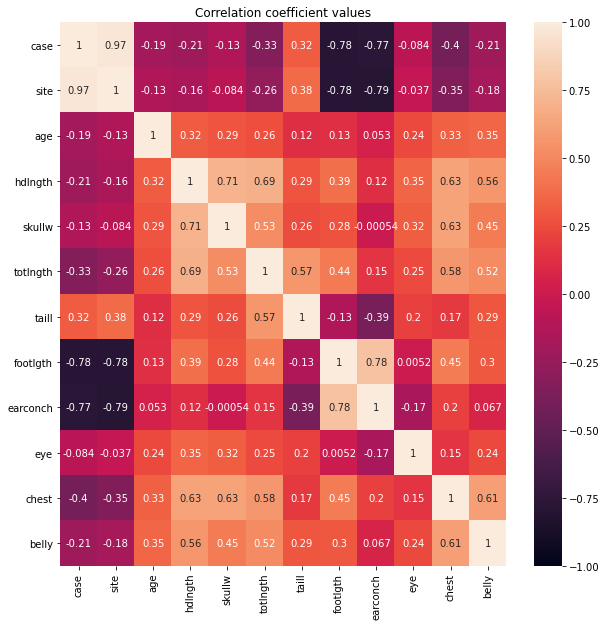

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(data_out.corr(), annot = True, vmin = -1, vmax = 1)
plt.title("Correlation coefficient values");